#### Task3. Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behaviorial data.

In [1]:
## The dataset used is bank marketing dataset from UCI Machine Learning Repository.

In [2]:
## importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns

In [3]:
df = pd.read_csv('bank-full.csv',delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
## Checking for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
## Hence, there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


 Here y is our target variable and rest are features


In [7]:
## Performing encoding on categorical variables
## Checking for unique values of each categorical variables
for column in df.select_dtypes(include="object").columns:
    print(f'Unique values in column {column}:')
    print(df[column].unique())

Unique values in column job:
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in column marital:
['married' 'single' 'divorced']
Unique values in column education:
['tertiary' 'secondary' 'unknown' 'primary']
Unique values in column default:
['no' 'yes']
Unique values in column housing:
['yes' 'no']
Unique values in column loan:
['no' 'yes']
Unique values in column contact:
['unknown' 'cellular' 'telephone']
Unique values in column month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in column poutcome:
['unknown' 'failure' 'other' 'success']
Unique values in column y:
['no' 'yes']


In [8]:
## Performing label encoding on the categorical variables
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns :
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


Accuracy is 84.57046801734053.
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      9950
           1       0.40      0.60      0.48      1353

    accuracy                           0.85     11303
   macro avg       0.67      0.74      0.70     11303
weighted avg       0.88      0.85      0.86     11303

Confusion Matrix: 
[[8744 1206]
 [ 538  815]]


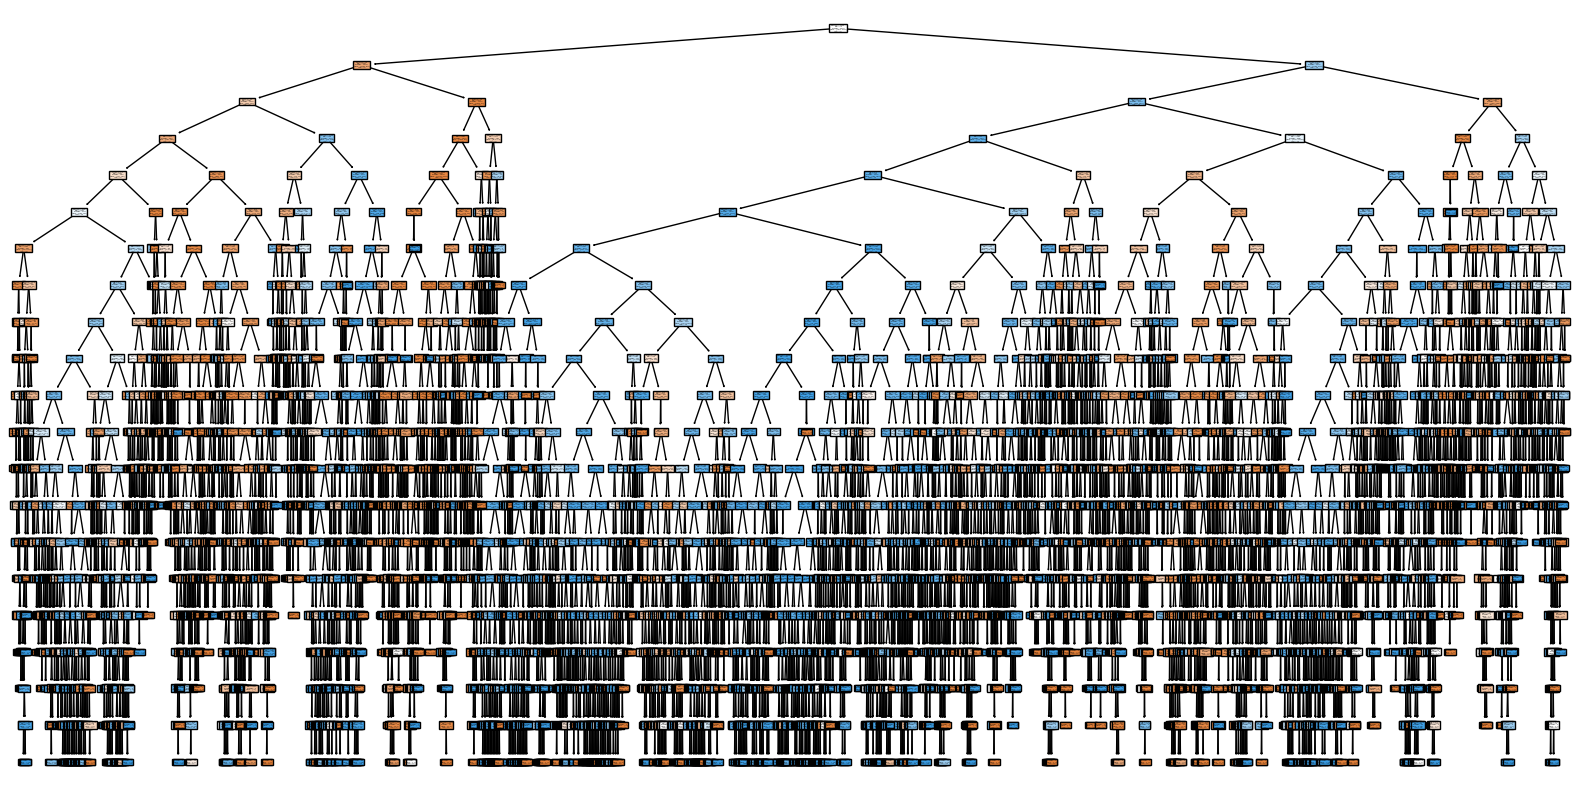

In [11]:
## Splitting the data into train,test
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

X = df.drop(columns='y',axis=1)
y = df['y']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## Doing resampling
smote = SMOTE()
X_resampled,y_resampled = smote.fit_resample(X_train,y_train)

## Initialising the base decision tree model

clf = DecisionTreeClassifier(random_state=42)

## setting the parameter grid
param_grid = {
    'max_depth':[None,10,20,30,40],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,5,10]
}

grid_search = GridSearchCV(clf , param_grid , cv = 5 , scoring = 'f1')
grid_search.fit(X_resampled,y_resampled)

## Trai.ning the best model
best_clf = grid_search.best_estimator_
best_clf.fit(X_resampled,y_resampled)

## Evaluating the model
y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)

print(f'Accuracy is {accuracy*100}.')
print('Classification report:')
print(report)
print('Confusion Matrix: ')
print(conf_matrix)

## Visulaising the tree
pyplot.figure(figsize=(20,10))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
pyplot.show()